In [11]:
import csv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import h5py
% matplotlib inline

In [12]:
lines = []
with open('../data1/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

images = []
measurements = []
for line in lines:
    filename = line[0].split('/')[-1]
    current_path = '../data1/IMG/' + filename
    image = mpimg.imread(current_path)
    images.append(image)
    measurement = float(line[3]) # line[3] type is str
    measurements.append(measurement)
    
# keras require numpy format
X_train = np.array(images)
y_train = np.array(measurements)
print(X_train.shape)
print(y_train.shape)

(2478, 160, 320, 3)
(2478,)


In [13]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers.convolutional import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Lambda
from keras.layers import Cropping2D

In [4]:
model = Sequential()
model.add(Flatten(input_shape=(160,320,3)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(X_train,y_train,validation_split=0.2,shuffle=True,epochs=6)
model.save('model.h5')

Train on 832 samples, validate on 209 samples
Epoch 1/6
832/832 [==============================] - 1s - loss: 34809116.8459 - val_loss: 376521.4910
Epoch 2/6
832/832 [==============================] - 0s - loss: 2441500.9087 - val_loss: 804180.9533
Epoch 3/6
832/832 [==============================] - 0s - loss: 186962.4349 - val_loss: 26207.2291
Epoch 4/6
832/832 [==============================] - 0s - loss: 40688.5422 - val_loss: 28384.5757
Epoch 5/6
832/832 [==============================] - 0s - loss: 12037.3958 - val_loss: 4368.2148
Epoch 6/6
832/832 [==============================] - 0s - loss: 7601.7692 - val_loss: 4945.5818


In [10]:
model = Sequential()
model.add(Cropping2D(cropping=((50, 20), (0, 0)), input_shape=(160,320,3)))
model.add(Lambda(lambda x:(x/255.0) - 0.5))
model.add(Convolution2D(6,5,5,activation='relu'))
model.add(MaxPooling2D())
model.add(Convolution2D(16,5,5,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(120))
model.add(Dense(84))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(X_train,y_train,validation_split=0.2,shuffle=True,epochs=4)
model.save('model.h5')

/home/skye/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), activation="relu")`
  after removing the cwd from sys.path.
/home/skye/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), activation="relu")`
  


Train on 3323 samples, validate on 831 samples
Epoch 1/4
3323/3323 [==============================] - 3s - loss: 2.4256 - val_loss: 0.0291
Epoch 2/4
3323/3323 [==============================] - 3s - loss: 0.0236 - val_loss: 0.0283
Epoch 3/4
3323/3323 [==============================] - 3s - loss: 0.0226 - val_loss: 0.0275
Epoch 4/4
3323/3323 [==============================] - 3s - loss: 0.0217 - val_loss: 0.0272


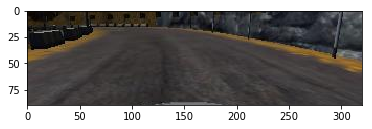

In [46]:
image = images[2856].copy()
crop_image = image[50:,:]
crop_image = crop_image[:90,:]
plt.imshow(crop_image)

## Flip the image

-0.1973611


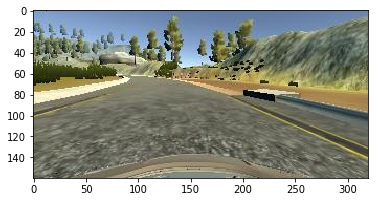

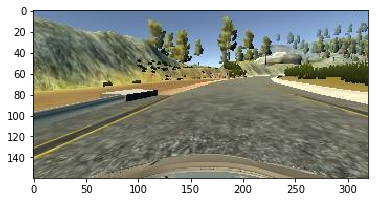

In [45]:
image_flipped = np.fliplr(images[2882])
plt.figure()
plt.imshow(images[2882])
plt.figure()
plt.imshow(image_flipped)
print(y_train[2882])

In [19]:
for image,measure in zip(images,measurements):
    image = image.reshape((1,160,320,3))
    # flip the image
    flip_image = np.fliplr(image)
    X_train = np.concatenate((X_train,flip_image),axis=0)
    
    measure = np.array([-measure])
    y_train = np.concatenate((y_train,measure))
print(X_train.shape)
print(y_train.shape)

(4154, 160, 320, 3)
(4154,)


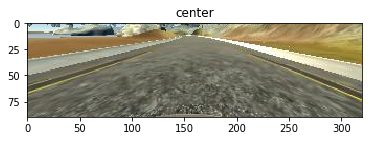

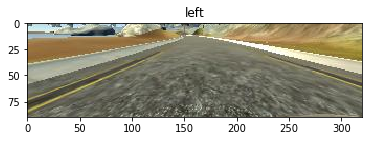

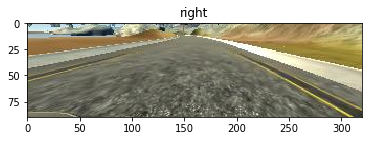

In [15]:
line = lines[200]
images = []
for i in range(3):
    filename = line[i].split('/')[-1]
    path =  '../data1/IMG/' + filename
    image = mpimg.imread(path)
    crop_image = image[50:140,:]
    images.append(crop_image)

plt.figure()
plt.title('center')
plt.imshow(images[0])


plt.figure()
plt.title('left')
plt.imshow(images[1])

plt.figure()
plt.title('right')
plt.imshow(images[2])

In [16]:
car_images = []
steering_angles = []
for line in lines:
    images = []
    for i in range(3):
        filename = line[i].split('/')[-1]
        path =  '../data1/IMG/' + filename
        image = mpimg.imread(path)
        images.append(image)
        
        steering_center = float(line[3])
       
        
    correction = 0.15
    steering_left = steering_center + correction
    steering_right = steering_center - correction
    car_images.extend(images)
    steering_angles.extend([steering_center, steering_left, steering_right])

X_train = np.array(car_images)
y_train = np.array(steering_angles)
print(X_train.shape)

(7434, 160, 320, 3)


In [19]:
model = Sequential()
model.add(Cropping2D(cropping=((50, 20), (0, 0)), input_shape=(160,320,3)))
model.add(Lambda(lambda x:(x/255.0) - 0.5))
model.add(Convolution2D(24,(5,5),strides=(2,2),activation='relu'))
model.add(Convolution2D(36,(5,5),strides=(2,2),activation='relu'))
model.add(Convolution2D(48,(5,5),strides=(2,2),activation='relu'))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(X_train,y_train,validation_split=0.2,shuffle=True,epochs=5)
model.save('model.h5')

Train on 5947 samples, validate on 1487 samples
Epoch 1/5
5947/5947 [==============================] - 5s - loss: 0.0212 - val_loss: 0.0339
Epoch 2/5
5947/5947 [==============================] - 4s - loss: 0.0145 - val_loss: 0.0314
Epoch 3/5
5947/5947 [==============================] - 4s - loss: 0.0136 - val_loss: 0.0328
Epoch 4/5
5947/5947 [==============================] - 4s - loss: 0.0126 - val_loss: 0.0356
Epoch 5/5
5947/5947 [==============================] - 4s - loss: 0.0115 - val_loss: 0.0340
